In [10]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [2]:
train_file_id = '11X-o0gnxdeE5nA186EV4lW7-IxT5HHTG'
train_output_file = 'train.csv'  

train_download_url = f'https://drive.google.com/uc?id={train_file_id}'

gdown.download(train_download_url, train_output_file, quiet=False)

df = pd.read_csv(train_output_file)

Downloading...
From: https://drive.google.com/uc?id=11X-o0gnxdeE5nA186EV4lW7-IxT5HHTG
To: d:\Document\Bangkit\Binary Classifcation with NN\train.csv
100%|██████████| 11.3k/11.3k [00:00<00:00, 609kB/s]


# Data Information

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
variables = [col for col in df.columns if df[col].nunique() <= 10]
for var in variables:
  print(f"====={var}=====")
  unique_values = df[var].unique()
  n_unique_values = df[var].nunique()
  value_counts = df[var].value_counts()

  print(f"Unique values in {var}: {unique_values}")
  print(f"Number of unique values in {var}: {n_unique_values}")
  print(f"Value counts in {var}:\n{value_counts}\n")

=====sex=====
Unique values in sex: [1 0]
Number of unique values in sex: 2
Value counts in sex:
sex
1    207
0     96
Name: count, dtype: int64

=====cp=====
Unique values in cp: [3 2 1 0]
Number of unique values in cp: 4
Value counts in cp:
cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

=====fbs=====
Unique values in fbs: [1 0]
Number of unique values in fbs: 2
Value counts in fbs:
fbs
0    258
1     45
Name: count, dtype: int64

=====restecg=====
Unique values in restecg: [0 1 2]
Number of unique values in restecg: 3
Value counts in restecg:
restecg
1    152
0    147
2      4
Name: count, dtype: int64

=====exng=====
Unique values in exng: [0 1]
Number of unique values in exng: 2
Value counts in exng:
exng
0    204
1     99
Name: count, dtype: int64

=====slp=====
Unique values in slp: [0 2 1]
Number of unique values in slp: 3
Value counts in slp:
slp
2    142
1    140
0     21
Name: count, dtype: int64

=====caa=====
Unique values in caa: [0 2 1 3 4]
Number of un

# Feature Engineering

## Scaling

In [6]:
num_columns = [col for col in df.columns if col not in variables]
ss = StandardScaler()

df[num_columns] = ss.fit_transform(df[num_columns])

# Modelling

## Train test split

In [7]:
features = [col for col in df.columns if col not in ['output']]
target = 'output'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Dropout: Mencegah overfitting dengan secara acak menonaktifkan 40% neuron selama pelatihan.

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid'),  
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))
print("Training completed.")

Epoch 1/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.5184 - loss: 0.7491 - val_accuracy: 0.8689 - val_loss: 0.6130
Epoch 2/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6330 - loss: 0.6501 - val_accuracy: 0.8361 - val_loss: 0.5790
Epoch 3/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5958 - loss: 0.6823 - val_accuracy: 0.8689 - val_loss: 0.5375
Epoch 4/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6841 - loss: 0.6591 - val_accuracy: 0.8525 - val_loss: 0.5024
Epoch 5/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7526 - loss: 0.5503 - val_accuracy: 0.8689 - val_loss: 0.4524
Epoch 6/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7173 - loss: 0.5237 - val_accuracy: 0.8689 - val_loss: 0.4104
Epoch 7/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7282 - loss: 0.5400 - val_accuracy: 0.8689 - val_loss: 0.3849
Epoch 8/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7339 - loss: 0.5133 - val_accuracy: 0.8689 - val_loss: 0.3731

# Visulization

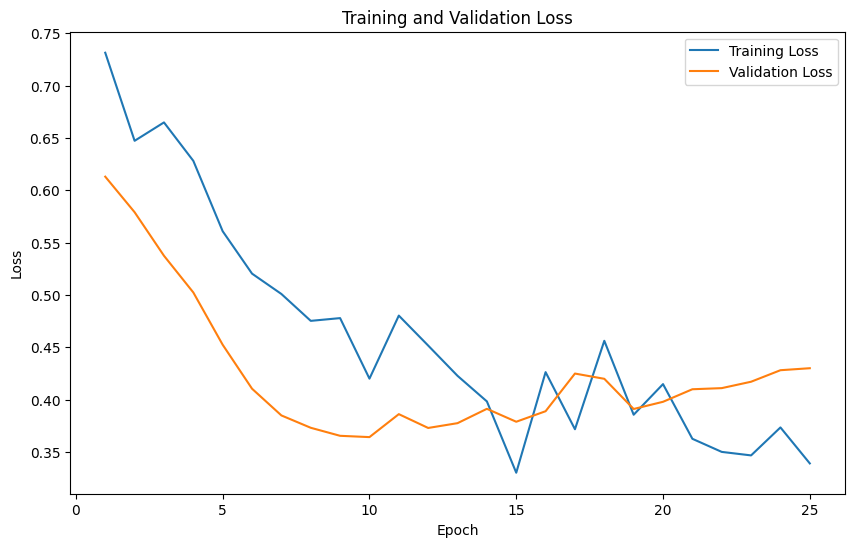

In [22]:
plt.figure(figsize=(10, 6))

EPOCHS = 25
epochs = range(1, EPOCHS + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [24]:
predictions = model.predict(X_test)
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)
binary_predictions

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0]])